In [2]:
import pandas as pd
import numpy as np

In [6]:
data = data = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='replace')

In [13]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4875,spam,lyricalladie(21/F) is inviting you to be her f...,NaN,NaN,NaN
3187,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
1694,ham,�� eatin later but i'm eatin wif my frens now ...,NaN,NaN,NaN
5501,spam,PRIVATE! Your 2003 Account Statement for 07808...,NaN,NaN,NaN
4994,ham,"Just looked it up and addie goes back Monday, ...",NaN,NaN,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [19]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [20]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
data.rename(columns={'v1':'target','v2':'text'},inplace= True)
data.sample(5)

,target,text
3464,ham,"Haha figures, well I found the piece and prisc..."
2213,ham,"Goodmorning, today i am late for 2hrs. Because..."
1417,ham,No wonder... Cos i dun rem seeing a silver car...
823,spam,25p 4 alfie Moon's Children in need song on ur...
322,ham,cud u tell ppl im gona b a bit l8 cos 2 buses ...


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [35]:
data['target']=encoder.fit_transform(data['target'])

In [36]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [38]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [44]:
data.drop_duplicates(inplace=True)

In [49]:
data.duplicated().sum()

0

# 2. EDA

In [52]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [53]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x29faa043700>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

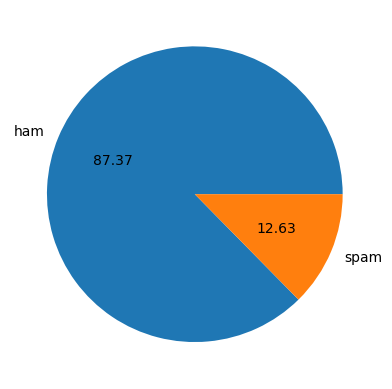

In [59]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [60]:
import nltk

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91848\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [63]:
data['num_characters']=data['text'].apply(len)

In [64]:
data.sample(4)

,target,text,num_characters
3044,0,"Hello, yeah i've just got out of the bath and ...",101
3676,0,Great! So what attracts you to the brothas?,43
2987,0,Do you still have the grinder?,30
2237,0,"Give her something to drink, if she takes it a...",127


In [67]:
# no. of words
data['no_of_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [70]:
data.head()

,target,text,num_characters,no_of_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [69]:
# no. of sentences
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [74]:
data[['num_characters','no_of_words','num_sentences']].describe()

,num_characters,no_of_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.454246,1.948152
std,58.174846,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [75]:
data[data['target']==0][['num_characters','no_of_words','num_sentences']].describe()

,num_characters,no_of_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.120903,1.799601
std,56.356802,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [76]:
data[data['target']==1][['num_characters','no_of_words','num_sentences']].describe()

,num_characters,no_of_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [78]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

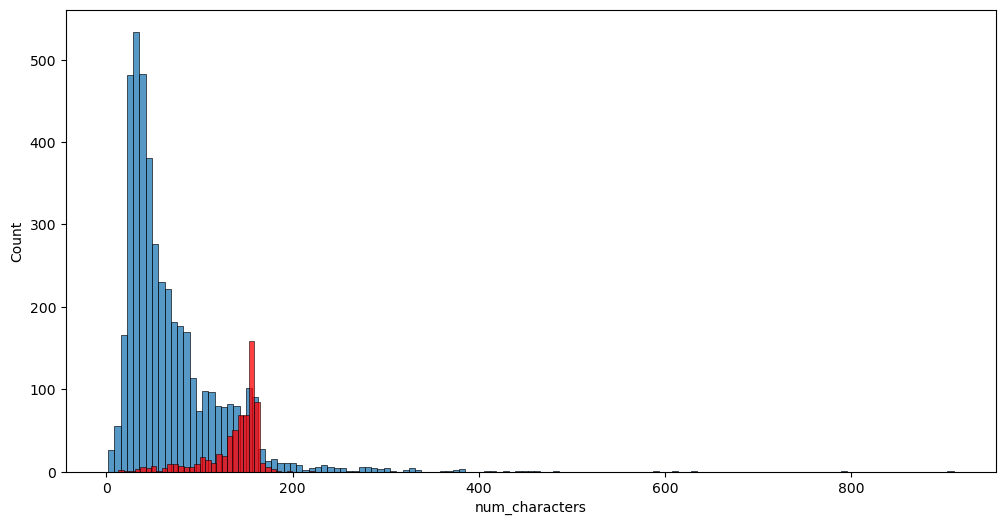

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

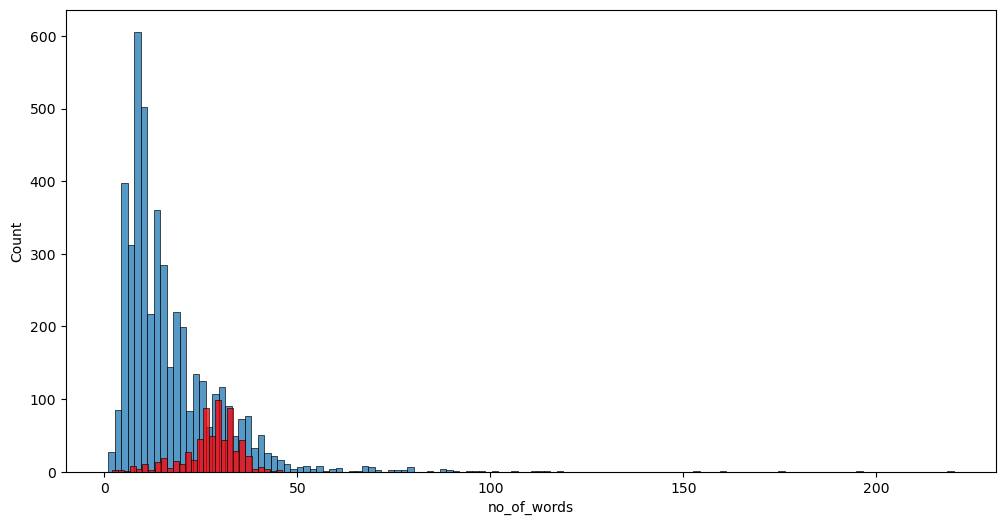

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['no_of_words'])
sns.histplot(data[data['target']==1]['no_of_words'],color='red')

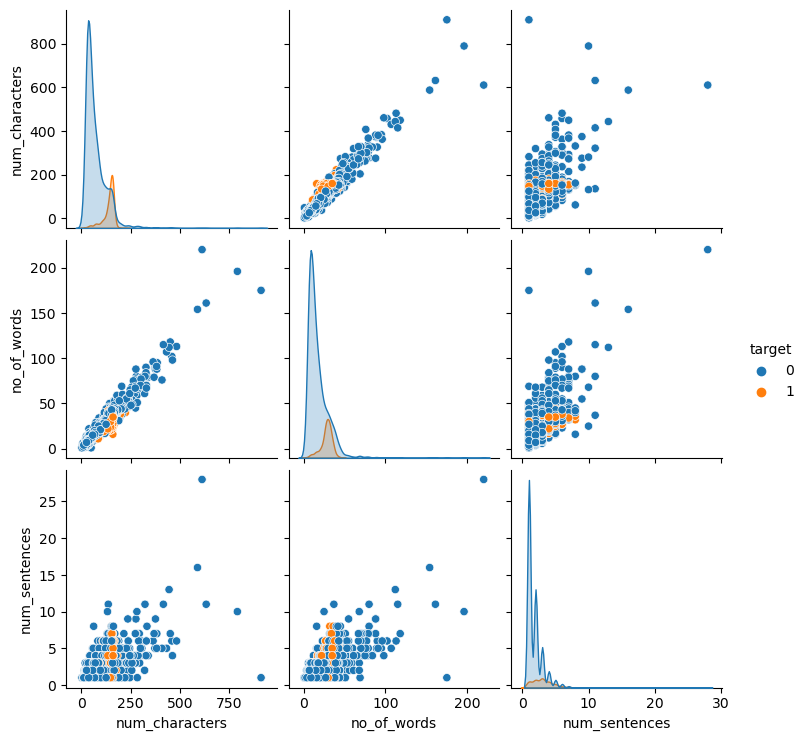

In [88]:
sns.pairplot(data,hue='target')

<AxesSubplot:>

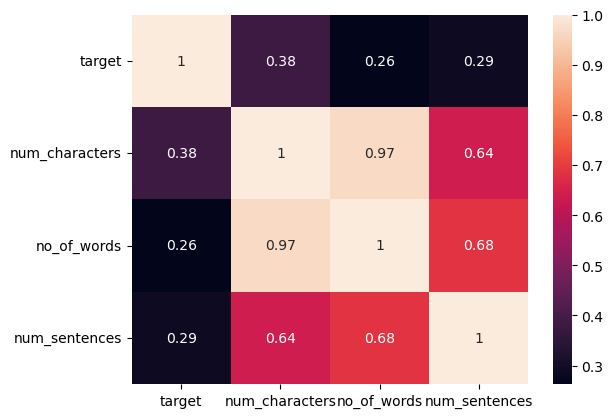

In [90]:
sns.heatmap(data.corr(),annot=True)

## 3.Data Preprocessing

* Lowercase
* Tokenization
* Removing special Characters
* Removing stop words and Punctuations
- stemming
   
    
    

In [140]:
def transform_text(text):
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [142]:
text='hi! why are you swimming and what is motivating you?'

In [143]:
transform_text(text)

'hi swim motiv'

In [122]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91848\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [123]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [131]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [139]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('running')

'run'

In [145]:
data['transformed_text']=data['text'].apply(lambda x:transform_text(x))

In [147]:
data.head()

,target,text,num_characters,no_of_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [151]:
from wordcloud import WordCloud
wc= WordCloud(width= 500, height=500,min_font_size=10,background_color='white')

In [150]:
!pip install wordcloud

     ------------------------------------- 300.4/300.4 kB 85.2 kB/s eta 0:00:00


In [154]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

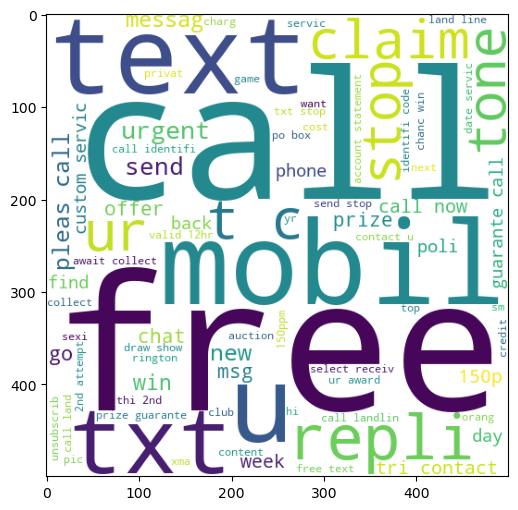

In [156]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [157]:
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

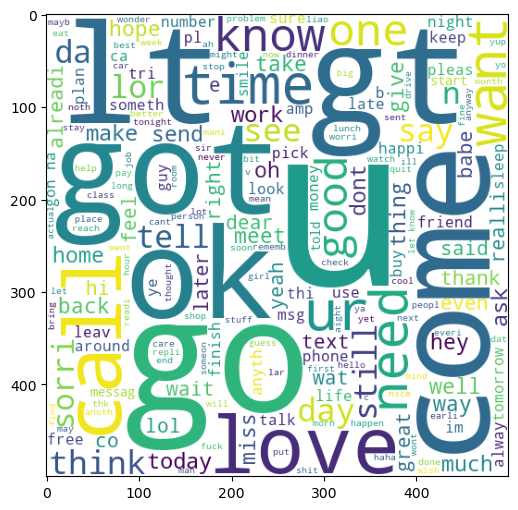

In [158]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [160]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [172]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [161]:
len(spam_corpus)

10849

In [168]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,157
3,txt,141
4,text,122
5,u,122
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\91848\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


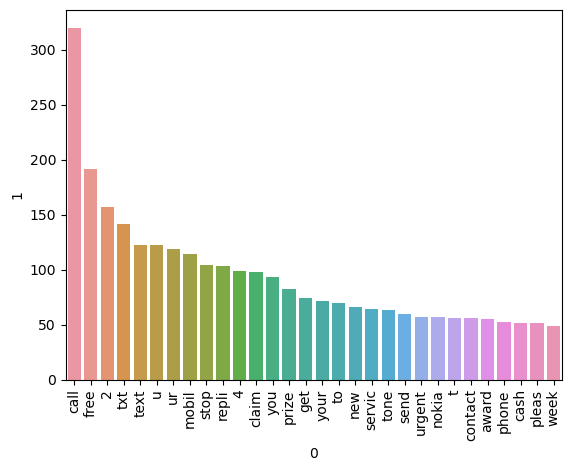

In [171]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\91848\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


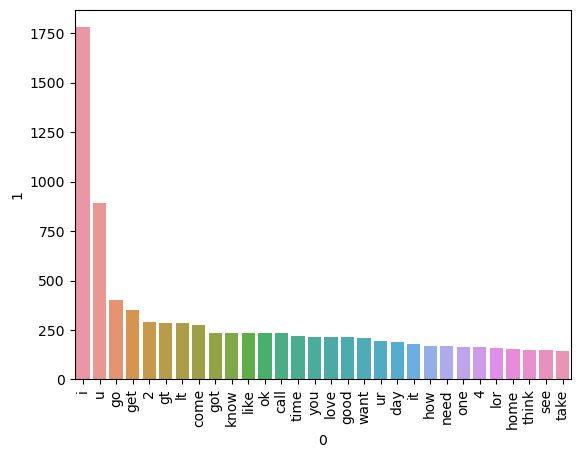

In [174]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [210]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [211]:
X= tfidf.fit_transform(data['transformed_text']).toarray()

In [202]:
X.shape

(5169, 6794)

In [203]:
y=data.target.values

In [184]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [185]:
from sklearn.model_selection import train_test_split

In [212]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [205]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [206]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [214]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))    

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [213]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))    

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [215]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))    

0.9835589941972921
[[896   0]
 [ 17 121]]
1.0


tfidf and mnb with 1 precision score

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [217]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 3.8 MB/s eta 0:00:00


In [219]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [220]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [221]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [222]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243


C:\Users\91848\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9758220502901354
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.84
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9509803921568627
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9016393442622951
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8582677165354331
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9401709401709402


In [223]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [224]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.975822,1.000000
0,SVC,0.977756,0.983193
5,RF,0.973888,0.982609
8,ETC,0.975822,0.966942
4,LR,0.955513,0.950980
10,xgb,0.966151,0.940171
9,GBDT,0.949710,0.930000
6,AdaBoost,0.961315,0.901639
7,BgC,0.954545,0.858268


In [227]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))